### Logistic Regression

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log


<IPython.core.display.Javascript object>


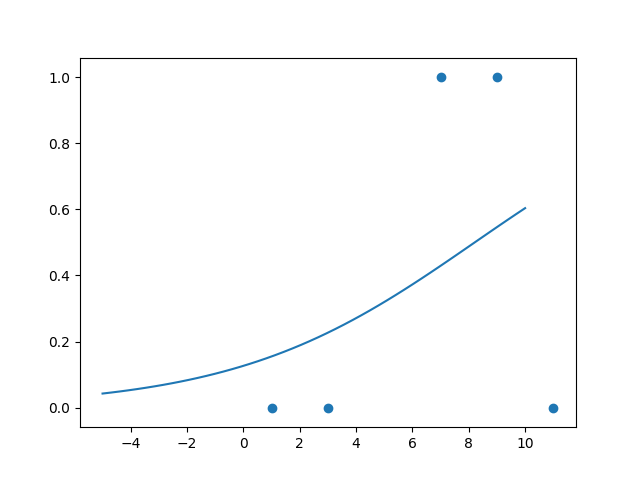

<IPython.core.display.Javascript object>


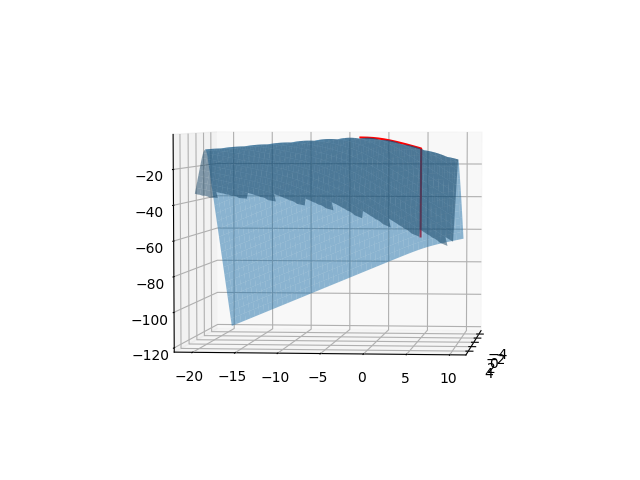

[ 0.4 -3.2]
-3.075273809468875
-39.470986608188504


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply


In [84]:
#@test {"output": "ignore"}
%matplotlib notebook
import tensorflow as tf
import numpy as np
import functools
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Dataset.
X = np.array([1, 3, 7, 9, 11])
Y = np.array([0, 0, 1, 1, 0])
X = np.vstack((X, np.ones(X.shape[0]))).T

Y = np.expand_dims(Y, -1)

# params = np.array([0.1, 2.5])
params = np.array([3., 6.])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def d_sigmoid(x):
    s = sigmoid(x)
    s = np.clip(s, 0.01, 0.99)
    return s * (1 - s)

def prob(params, x=X):
    logits = np.sum(params * x, axis=1, keepdims=True)
    return sigmoid(logits)

def d_prob(params):
    logits = np.sum(params * X, axis=1, keepdims=True)
    s = sigmoid(logits)
    return d_sigmoid(logits) * X

def likelihood(params):
    probs = prob(params)
    l = np.power(probs, Y) * np.power(1 - probs, 1 - Y)
    return np.product(l)

def log_likelihood(params):
    # probs = np.clip(prob(params), 0.01, 0.99)
    probs = np.log(prob(params))
    n_probs = np.log(1 - prob(params))
    l = Y * probs + (1 - Y) * n_probs
    return np.sum(l)

def d_log_likelihood(params):
    probs = prob(params)
    probs = np.clip(prob(params), 0.01, 0.99)
    d_probs = d_prob(params)
    r = d_probs * ( (Y / probs) - ((1 - Y) / (1 - probs)) )
    return np.sum(r, axis=0)

steps = []
def gradient_descent(params, epochs=1000, learning_rate=0.01):
    for _ in range(epochs):
        d_params = d_log_likelihood(params)
        params += learning_rate * d_params
        ll = log_likelihood(params)
        steps.append((params[0], params[1], ll))

gradient_descent(params, epochs=2000)

def print_2d():
    # print(params)
    fig = plt.figure(1)
    ax = fig.add_subplot(111)
    ax.scatter(X[:,0], Y[:,0])  

    x = np.linspace(-5, 10, 50)
    inp = np.vstack((x, np.ones(x.shape[0]))).T
    y = prob(params, x=inp)
    ax.plot(x, y)
      
def print_3d():
    fig = plt.figure(2)
    ax = fig.add_subplot(111, projection='3d')

    max_ll = -10000.0
    max_params = [0.0, 0.0]
    
    x = np.arange(-5, 5, 0.3)
    y = np.arange(-20, 10, 0.3)
    x, y = np.meshgrid(x, y)
    z = np.zeros(x.shape)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            params = np.array([x[i][j], y[i][j]])
            z[i][j] = log_likelihood(params)
            if (z[i][j] > max_ll):
                max_params = params
                max_ll = z[i][j]

    print(max_params)        
    print(max_ll)   
       
    x2 = [s[0] for s in steps]
    y2 = [s[1] for s in steps]
    z2 = [s[2] for s in steps]
    
    ax.plot(x2, y2, z2, color='red')
    ax.plot_surface(x, y, z, alpha=0.5)
    
print_2d()
print_3d()
    
plt.show()

print(log_likelihood([3.79,-6.8991]))    